In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Audit_Risk = pd.read_csv('audit_risk.csv')
Trials = pd.read_csv('trial.csv')

In [3]:
Audit_Risk.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [4]:
Audit_Risk.shape

(776, 27)

In [5]:
#Checking the null values in Audit_Risk and Trials
Audit_Risk.isnull().any()

Sector_score      False
LOCATION_ID       False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value        True
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
dtype: bool

In [6]:
len(Audit_Risk) - Audit_Risk.count()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [7]:
Trials.isnull().any()

Sector_score     False
LOCATION_ID      False
PARA_A           False
SCORE_A          False
PARA_B           False
SCORE_B          False
TOTAL            False
numbers          False
Marks            False
Money_Value       True
MONEY_Marks      False
District         False
Loss             False
LOSS_SCORE       False
History          False
History_score    False
Score            False
Risk             False
dtype: bool

In [8]:
len(Trials) - Trials.count()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [9]:
audit_columns = set(Audit_Risk.columns)
trial_colums = set(Trials.columns)

audit_columns.intersection(trial_colums)


{'History',
 'LOCATION_ID',
 'Money_Value',
 'PARA_A',
 'PARA_B',
 'Risk',
 'Score',
 'Sector_score',
 'TOTAL',
 'numbers'}

In [10]:
Trials=Trials.drop_duplicates(keep='first')
Audit_Risk=Audit_Risk.drop_duplicates(keep='first')

In [11]:
#merging the Audit_Risk and Trials on common columns
merged = Audit_Risk.merge(Trials, how = 'inner', on = ['History', 'LOCATION_ID', 'Money_Value','PARA_A','PARA_B','Score','Sector_score','TOTAL','numbers'], sort = False)

In [12]:
merged.shape

(763, 36)

In [13]:
#Checking for null values in the merged dataset
merged.isnull().any()

Sector_score      False
LOCATION_ID       False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value        True
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk_x            False
SCORE_A           False
SCORE_B           False
Marks             False
MONEY_Marks       False
District          False
Loss              False
LOSS_SCORE        False
History_score     False
Risk_y            False
dtype: bool

Money_Value is the only column that has a null value.

In [14]:
#Replacing the string values in the LOCATION_ID column
#merged = merged.replace(['LOHARU', 'NUH', 'SAFIDON'], [0,0,0])
merged = merged[merged['LOCATION_ID']!='LOHARU']
merged = merged[merged['LOCATION_ID']!='NUH']
merged = merged[merged['LOCATION_ID']!='SAFIDON']

In [15]:
#Converting the LOCATION_ID column with replaced string values to a float column
merged['LOCATION_ID'] = merged['LOCATION_ID'].astype(float)

In [16]:
#Imputing the missing value in the Money_Value column
merged['Money_Value'] = merged['Money_Value'].replace('', np.nan)
merged['Money_Value'] = merged['Money_Value'].replace(np.nan,merged.Money_Value.mean())


In [17]:
#Checking if the null values in Money_Value are replaced
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 762
Data columns (total 36 columns):
Sector_score      760 non-null float64
LOCATION_ID       760 non-null float64
PARA_A            760 non-null float64
Score_A           760 non-null float64
Risk_A            760 non-null float64
PARA_B            760 non-null float64
Score_B           760 non-null float64
Risk_B            760 non-null float64
TOTAL             760 non-null float64
numbers           760 non-null float64
Score_B.1         760 non-null float64
Risk_C            760 non-null float64
Money_Value       760 non-null float64
Score_MV          760 non-null float64
Risk_D            760 non-null float64
District_Loss     760 non-null int64
PROB              760 non-null float64
RiSk_E            760 non-null float64
History           760 non-null int64
Prob              760 non-null float64
Risk_F            760 non-null float64
Score             760 non-null float64
Inherent_Risk     760 non-null float64
CO

Scaling is an essential step before fitting the models as most estimators are developed with an assumption that the features involved vary on a comparable scale. We believe checking for outliers and knowing the distribution of data will help us decide on the type of scaling to be used.

In [18]:
#Checking for outliers in the merged dataframe for deciding on the type of scaling to be used
from numpy import mean
from numpy import std

for i in merged:
    data_mean, data_std = mean(merged[i]), std(merged[i])
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in merged[i] if x < lower or x > upper]
    print('Identified outliers in ' + i + ': %d' % len(outliers))

Identified outliers in Sector_score: 0
Identified outliers in LOCATION_ID: 0
Identified outliers in PARA_A: 7
Identified outliers in Score_A: 0
Identified outliers in Risk_A: 7
Identified outliers in PARA_B: 1
Identified outliers in Score_B: 0
Identified outliers in Risk_B: 1
Identified outliers in TOTAL: 2
Identified outliers in numbers: 22
Identified outliers in Score_B.1: 22
Identified outliers in Risk_C: 22
Identified outliers in Money_Value: 6
Identified outliers in Score_MV: 0
Identified outliers in Risk_D: 6
Identified outliers in District_Loss: 0
Identified outliers in PROB: 22
Identified outliers in RiSk_E: 6
Identified outliers in History: 15
Identified outliers in Prob: 15
Identified outliers in Risk_F: 15
Identified outliers in Score: 0
Identified outliers in Inherent_Risk: 7
Identified outliers in CONTROL_RISK: 15
Identified outliers in Detection_Risk: 0
Identified outliers in Audit_Risk: 6
Identified outliers in Risk_x: 0
Identified outliers in SCORE_A: 0
Identified outli

C:\Users\lavan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


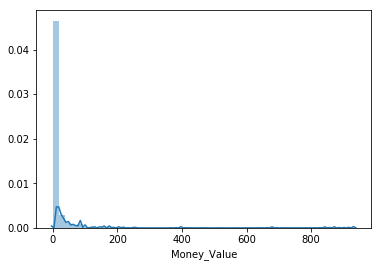

In [19]:
sns.distplot(merged['Money_Value'])

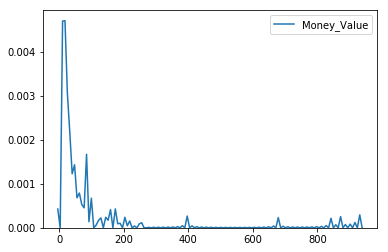

In [20]:
sns.kdeplot(merged['Money_Value'])

In [21]:
merged_columns = list(merged.columns)

C:\Users\lavan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\lavan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\lavan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


(0, 50)

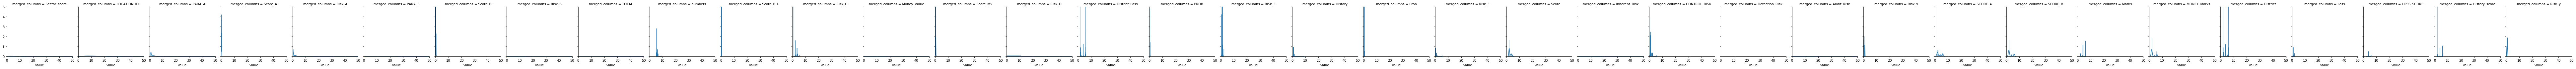

In [22]:
merged_distplots = pd.DataFrame(merged, columns = merged_columns)
merged_distplots_melt = merged_distplots.melt(var_name='merged_columns')
merged_distplots = sns.FacetGrid(merged_distplots_melt, col='merged_columns')
merged_distplots = (merged_distplots.map(sns.distplot, 'value'))
axes = merged_distplots.axes
axes[0,0].set_ylim(0,5)
axes[0,0].set_xlim(0,50)

Since it is evident from the above distribution plots that the distribution of data is not Gaussian, MinMax Scaler is a better fit for our data. After MinMax scaling, we have smaller standard deviations in our data and we therefore end up with suppressed effect of outliers.

In the research this dataset is taken from, Particle Swarm optimization(PSO) is used for feature extraction. PSO is used to minimize the total root of squared differences between Audit risk and total of product of features and their respective weights. After running the PSO to minimize the above value, the final formula derived reveals that Fraud is functionally dependent on the following columns:
PARA_A, PARA_B, numbers, Money_Value, Sector_score, History, District, Loss

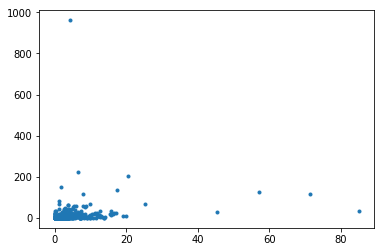

In [23]:
plt.plot(merged['PARA_A'],merged['Audit_Risk'],'.')

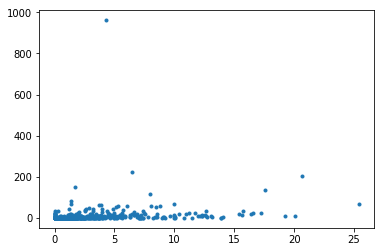

In [24]:
merged=merged[abs(merged['PARA_A'])<40]
plt.plot(merged['PARA_A'],merged['Audit_Risk'],'.')

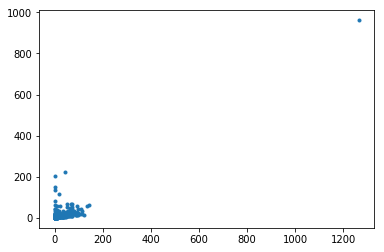

In [25]:
plt.plot(merged['PARA_B'],merged['Audit_Risk'],'.')

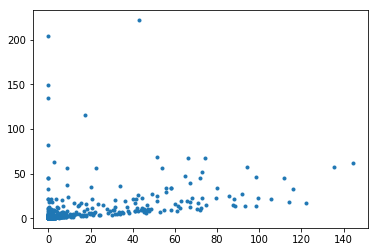

In [26]:
merged=merged[abs(merged['PARA_B'])<200]
plt.plot(merged['PARA_B'],merged['Audit_Risk'],'.')

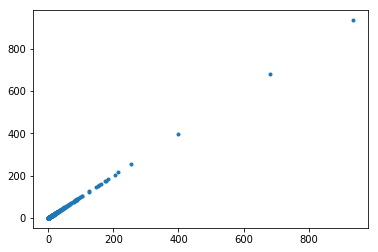

In [27]:
plt.plot(merged['Money_Value'],merged['Money_Value'],'.')

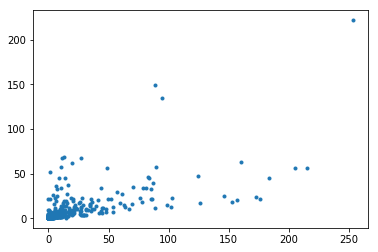

In [28]:
merged=merged[abs(merged['Money_Value'])<300]
plt.plot(merged['Money_Value'],merged['Audit_Risk'],'.')

In [29]:
data = merged[['Sector_score','numbers','PARA_A', 'PARA_B',
       'TOTAL','Money_Value', 'Prob', 'Marks', 'District_Loss', 'Loss','History_score', 'Audit_Risk']]

# Regression Tasks

### Setting the target column

In [30]:
y = data['Audit_Risk']
X = data.drop(['Audit_Risk'], axis = 1)

### Splitting the data

In [31]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

### Scaling the data

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)

C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [33]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(X_train, y_train)

print('Train score: %.4f'%lreg.score(X_train, y_train))
print('Test score: %.4f'%lreg.score(X_test, y_test))

Train score: 0.7902
Test score: 0.6730


Text(0.5, 0, 'RM')

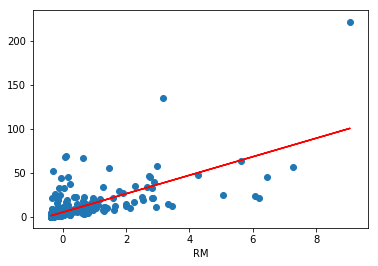

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

Text(0.5, 0, 'RM')

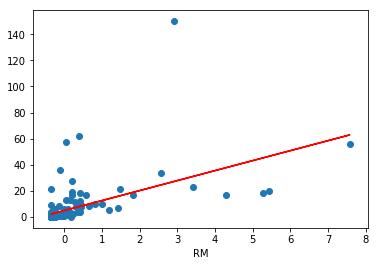

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

X_test_rm = X_test[:,5].reshape(-1,1)
lreg.fit(X_test_rm, y_test)
y_predict = lreg.predict(X_test_rm)

plt.plot(X_test_rm, y_predict, c = 'r')
plt.scatter(X_test_rm,y_test)
plt.xlabel('RM')

In [36]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

print(train_score_list)
print(test_score_list)

[0.7901343036722283, 0.7900138768183538, 0.7899707558979767, 0.789859587019835, 0.7822584954223712]
[0.6738940604742254, 0.6724167919554171, 0.6720004833580429, 0.6751452978727293, 0.6936670915220402]


Text(0.5, 0, '$\\alpha$')

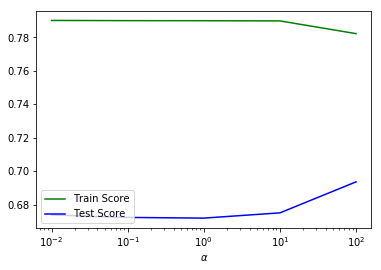

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

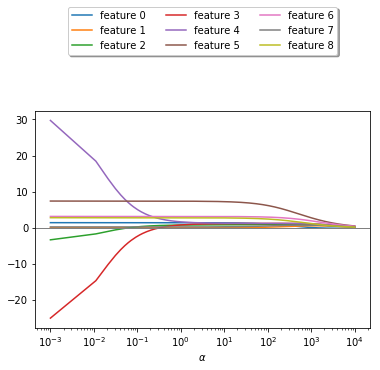

In [38]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,9):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [39]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    
print(train_score_list)
print(test_score_list)

[0.7899762537730621, 0.7897010114646428, 0.7683981768777554, 0.048749319858695794, 0.0]
[0.6718023884609052, 0.6722015731425652, 0.6650475425907132, 0.03869400933436862, -0.00039469706565697926]


Text(0.5, 0, '$\\alpha$')

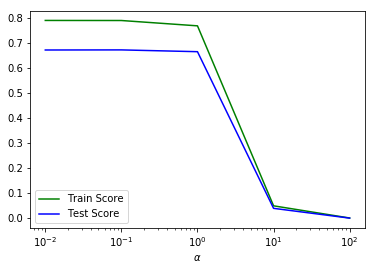

In [40]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

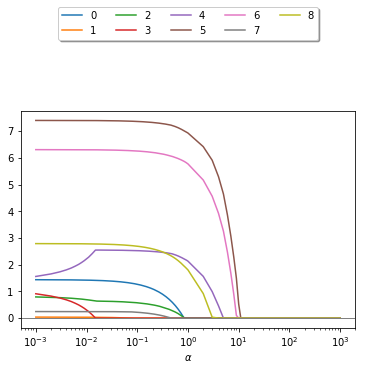

In [41]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,9):
    plt.plot(x_range, coeff[:,i], label = i)

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=5, fancybox=True, shadow=True)
plt.show()

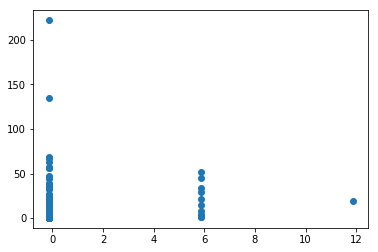

In [42]:
from  sklearn.preprocessing  import PolynomialFeatures

X_train_1 = X_train[:,9].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [43]:
train_score_list = []
test_score_list = []

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    
print(train_score_list)
print(test_score_list)

[0.7901681570198079, 0.9943916837436455, 0.9998850229541847]
[0.6730318326927611, -8.414178870279368e+19, -5.936295637452064e+19]


Text(0, 0.5, 'R2-Score')

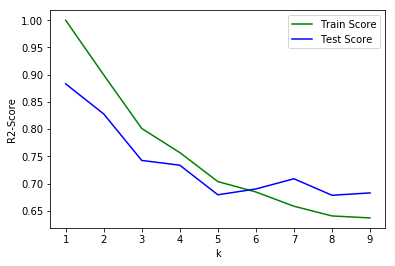

In [44]:
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('R2-Score')

In [45]:
print(train_score_array)
print(test_score_array)

[1.0, 0.8995841664820404, 0.8011043407842403, 0.756820304626057, 0.7035527018933339, 0.6844149484245001, 0.6582621805876111, 0.6404047551808165, 0.6367695926933543]
[0.8830839466125789, 0.8278487560202539, 0.7423784156665123, 0.7336567747069493, 0.6792692095186074, 0.689956119077541, 0.7087193936285868, 0.6783914711114427, 0.6827211840467644]


In [46]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
y_lin = svr_lin.fit(X_train, y_train).predict(X_test)


print("Coefficient shape: ", svr_lin.coef_.shape)
print("Intercept shape: ", svr_lin.intercept_.shape)

Coefficient shape:  (1, 11)
Intercept shape:  (1,)


### Classification Tasks 

In [47]:
data_c = merged[['PARA_A', 'PARA_B', 'numbers', 'Money_Value', 'Sector_score', 'History', 'District', 'Loss', 'Risk_x']]

In [48]:
y = data_c['Risk_x']
X = data_c.drop(['Risk_x'], axis = 1)

In [49]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)

C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [51]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

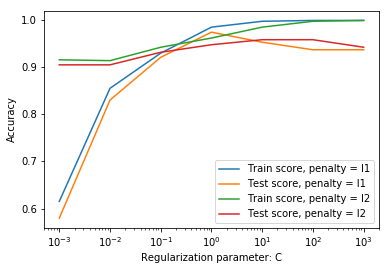

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


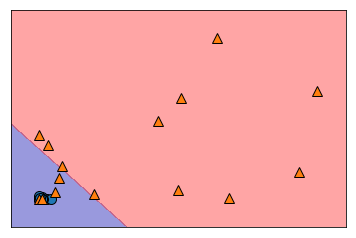

In [53]:
%matplotlib inline
import mglearn
X_b = X_train[10:50, [1,3]]
y_b = y_train[10:50]

lreg = LogisticRegression()
lreg.fit(X_b, y_b) 

mglearn.plots.plot_2d_separator(lreg, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

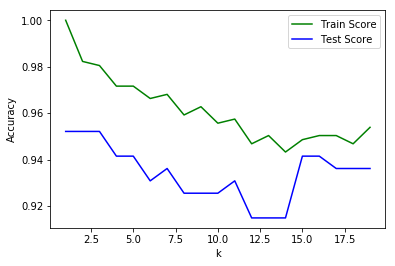

In [55]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [56]:
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9557
Test score: 0.9255


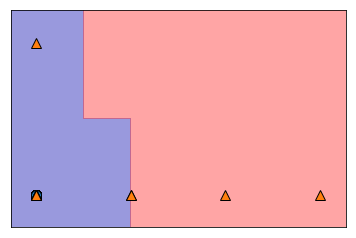

In [57]:
import mglearn
X_b = X_train[100:150,[2,5]]
y_b = y_train[100:150]

knn = KNeighborsClassifier(10)
knn.fit(X_b, y_b) 

mglearn.plots.plot_2d_separator(knn, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

In [58]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X_train, y_train)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (1, 8)
Intercept shape:  (1,)


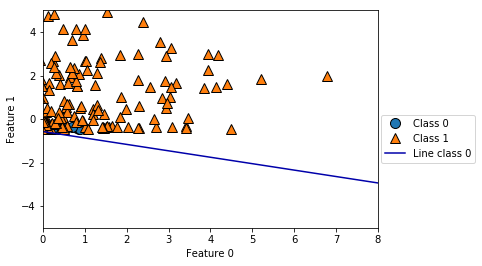

In [59]:
%matplotlib inline
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-5, 5)
plt.xlim(0, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Line class 0'], loc=(1.01, 0.3))

In [60]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.931


In [61]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.936
